In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def induce_covariate_drift(df, significance_levels=(0.05, 0.01)):
    """
    Function to induce covariate drift in a dataframe and test for significance using KS test.
    
    Parameters:
    - df: pandas DataFrame
        Input dataframe containing the features.
    - significance_levels: tuple of floats, optional (default=(0.05, 0.01))
        The significance levels for the KS test.
    
    Returns:
    - drifted_data_0_01: pandas DataFrame
        The drifted dataframe for significance level 0.01.
    - drift_logic: list
        A list containing the drift inducing logic for each feature.
    """
    
    original_data = df.copy()
    drifted_data = df.copy()
    drift_logic = []

    for significance_level in significance_levels:
        while True:
            # Induce covariate drift for each feature
            for col in df.columns:
                # Generate random drift logic (you can customize this logic as needed)
                drift_factor = np.random.uniform(0.8, 1.2)  # drift factor between 0.8 and 1.2
                drifted_data[col] = original_data[col] * drift_factor
                drift_logic.append((col, drift_factor))

            # Perform KS test for each feature to check significance of drift
            ks_results = {}
            for col in df.columns:
                _, p_value = ks_2samp(original_data[col], drifted_data[col])
                ks_results[col] = p_value

            # Check if any p-value is less than significance_level
            significant_drift = any(p_value < significance_level for p_value in ks_results.values())
            if significant_drift:
                break

        # Visualization with Seaborn
        plt.figure(figsize=(16, 8))
        sns.set(style="whitegrid")

        for i, col in enumerate(df.columns):
            plt.subplot(2, len(df.columns)//2, i+1)
            sns.histplot(original_data[col], color='blue', label='Original', kde=True)
            sns.histplot(drifted_data[col], color='orange', label='Drifted', kde=True)
            plt.title(col)
            plt.xlabel('Feature Values')
            plt.ylabel('Density')
            plt.legend()

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.suptitle(f'Significance Level: {significance_level}', fontsize=16)
        plt.savefig(f'drift_plot_{str(significance_level).replace(".", "_")}.png')
        plt.show()

    return drifted_data, drift_logic

# Example usage:
# Assuming you have a dataframe df
# drifted_data_0_01, drift_logic = induce_covariate_drift(df, significance_levels=(0.05, 0.01))

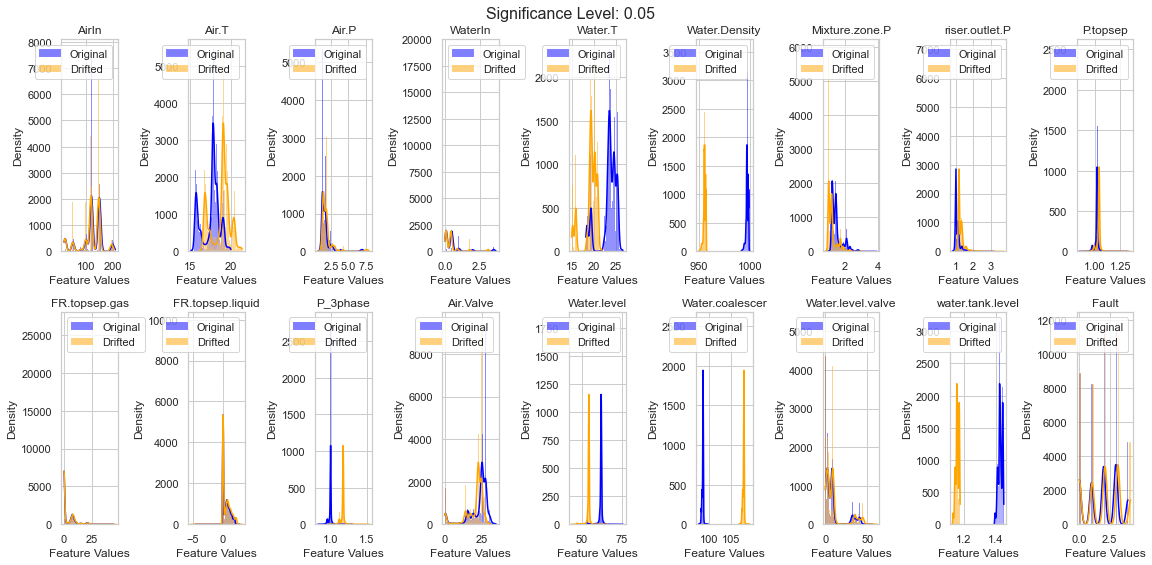

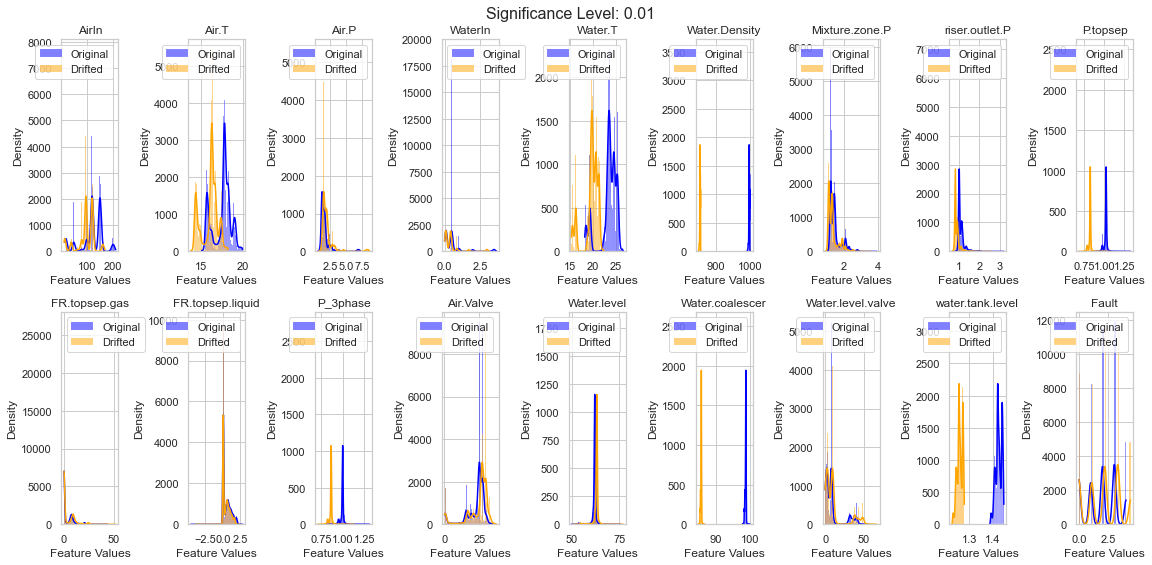

[('AirIn', 0.9826422478852957), ('Air.T', 1.0693669078723533), ('Air.P', 1.0976353594604285), ('WaterIn', 0.8856630868001988), ('Water.T', 0.8218990021957794), ('Water.Density', 0.9587379730689395), ('Mixture.zone.P', 0.8241414692557503), ('riser.outlet.P', 1.171526409887095), ('P.topsep', 1.0187363723086837), ('FR.topsep.gas', 1.0359634580310209), ('FR.topsep.liquid', 1.1503513133075303), ('P_3phase', 1.1741311158503884), ('Air.Valve', 0.9003430353633799), ('Water.level', 0.8750257775066119), ('Water.coalescer', 1.0924355971798492), ('Water.level.valve', 1.0911187354076939), ('water.tank.level', 0.8126074069540083), ('Fault', 1.056033201240155), ('AirIn', 0.8034067485461261), ('Air.T', 0.914600388519134), ('Air.P', 1.1962016384588217), ('WaterIn', 0.857810702080723), ('Water.T', 0.839775654401302), ('Water.Density', 0.8569129836978759), ('Mixture.zone.P', 0.9116243332322409), ('riser.outlet.P', 0.8142585012884146), ('P.topsep', 0.8067225478013943), ('FR.topsep.gas', 1.1886362198848541

In [3]:
# Example usage:
data = pd.read_csv(r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance\Data\pronto.csv")
drifted_data, drift_logic = induce_covariate_drift(data)
print(drift_logic)